In [66]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [67]:
shape_file = gpd.read_file("/workspaces/Emergency-Services-Comparison/maps/countries/ne_50m_admin_0_countries.shp")
shape_file.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


<Axes: >

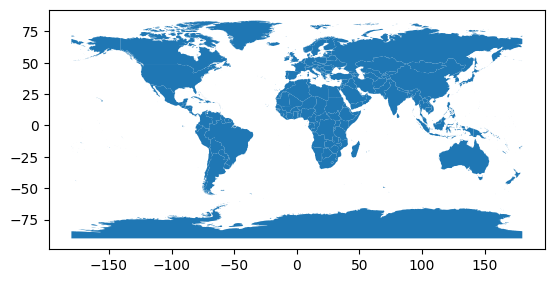

In [68]:
shape_file.plot()

<Axes: >

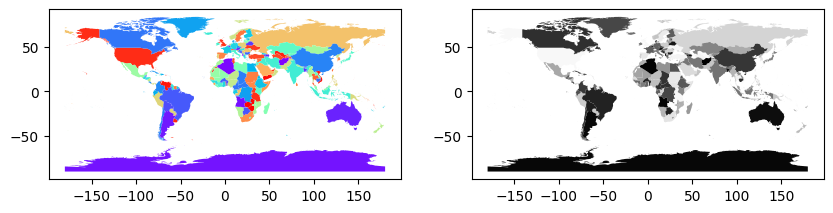

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Use the 'name' column for coloring
shape_file.plot(column='SOVEREIGNT', ax=ax1, cmap='rainbow')

shape_file.plot(column='SOVEREIGNT', ax=ax2, cmap='Greys_r')

In [70]:
countries = shape_file.SOVEREIGNT.iloc()[:]
countries.head()

0     Zimbabwe
1       Zambia
2        Yemen
3      Vietnam
4    Venezuela
Name: SOVEREIGNT, dtype: object

In [71]:

df_map = gpd.GeoDataFrame({
    'country': shape_file['SOVEREIGNT'],
    'geometry': shape_file['geometry']
})
df_map.head()

,country,geometry
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [72]:
df_map = df_map.explode()

df_map = df_map.reset_index(drop=True)

df_map.head()

/tmp/ipykernel_1810/235945040.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df_map = df_map.explode()


,country,geometry
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,"POLYGON ((53.08564 16.64839, 52.58145 16.47036..."
3,Yemen,"POLYGON ((42.59023 15.30342, 42.55869 15.28120..."
4,Yemen,"POLYGON ((42.75586 13.70430, 42.68975 13.67363..."


In [73]:

df_map_color = gpd.GeoDataFrame({
    'country': df_map['country'],
    'geometry': df_map['geometry'],
    'color': [(i, i, i) for i in df_map.index]
})
df_map_color.head()

,country,geometry,color
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...","(0, 0, 0)"
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...","(1, 1, 1)"
2,Yemen,"POLYGON ((53.08564 16.64839, 52.58145 16.47036...","(2, 2, 2)"
3,Yemen,"POLYGON ((42.59023 15.30342, 42.55869 15.28120...","(3, 3, 3)"
4,Yemen,"POLYGON ((42.75586 13.70430, 42.68975 13.67363...","(4, 4, 4)"


colormap explanation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

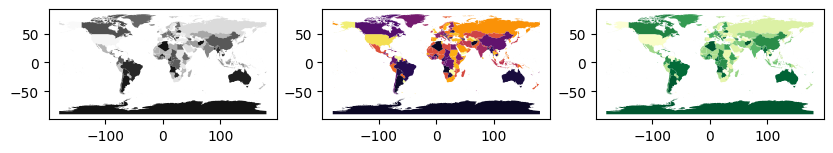

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

# Use the 'color' column for coloring
df_map_color.plot(column='color', ax=ax1, cmap='Greys')
df_map_color.plot(column='color', ax=ax2, cmap='inferno_r')
df_map_color.plot(column='color', ax=ax3, cmap='YlGn')

plt.show()

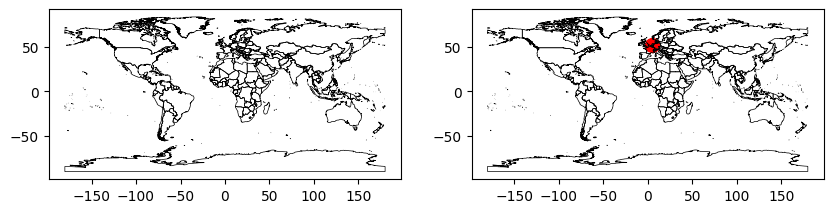

In [75]:
from shapely.geometry import Point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

#  Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax1, linewidth=0.5, color = "black")

#  Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax2, linewidth=0.5, color = "black")
#here create a geodataframe with the point 52.08340603517653, 5.1501312031412105 and plot it on ax2


# Create a GeoDataFrame with a single point
point_geometry = gpd.GeoDataFrame(geometry=[Point(5.1501312031412105, 52.08340603517653)])

# Plot the point on ax2
point_geometry.plot(ax=ax2, color='red', markersize=100)

# Show the plot
plt.show()

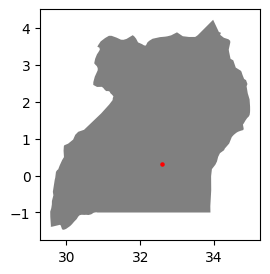

In [76]:
country_name = 'Uganda'  # Replace with the country you want to plot
selected_country = df_map[df_map['country'] == country_name]

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

# Plot the selected country
selected_country.plot(ax=ax, color='grey', zorder=1)  # You can choose any color you want

# Create a GeoDataFrame with a single point
Kampala = gpd.GeoDataFrame(geometry=[Point(32.57851235426574, 0.3146358586289159)])

# Plot the point on ax
Kampala.plot(ax=ax, color='red', markersize=5, zorder=2)

# Show the plot
plt.show()


In [77]:
df_centroids = df_map.copy()
df_centroids = df_centroids.to_crs(df_map.crs)
df_centroids['centroid'] = df_centroids['geometry'].centroid

df_centroids.head()

/tmp/ipykernel_1810/1295017106.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_centroids['centroid'] = df_centroids['geometry'].centroid


,country,geometry,centroid
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",POINT (29.85144 -19.00420)
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",POINT (27.77476 -13.45824)
2,Yemen,"POLYGON ((53.08564 16.64839, 52.58145 16.47036...",POINT (47.54064 15.93601)
3,Yemen,"POLYGON ((42.59023 15.30342, 42.55869 15.28120...",POINT (42.58534 15.35657)
4,Yemen,"POLYGON ((42.75586 13.70430, 42.68975 13.67363...",POINT (42.74385 13.72604)


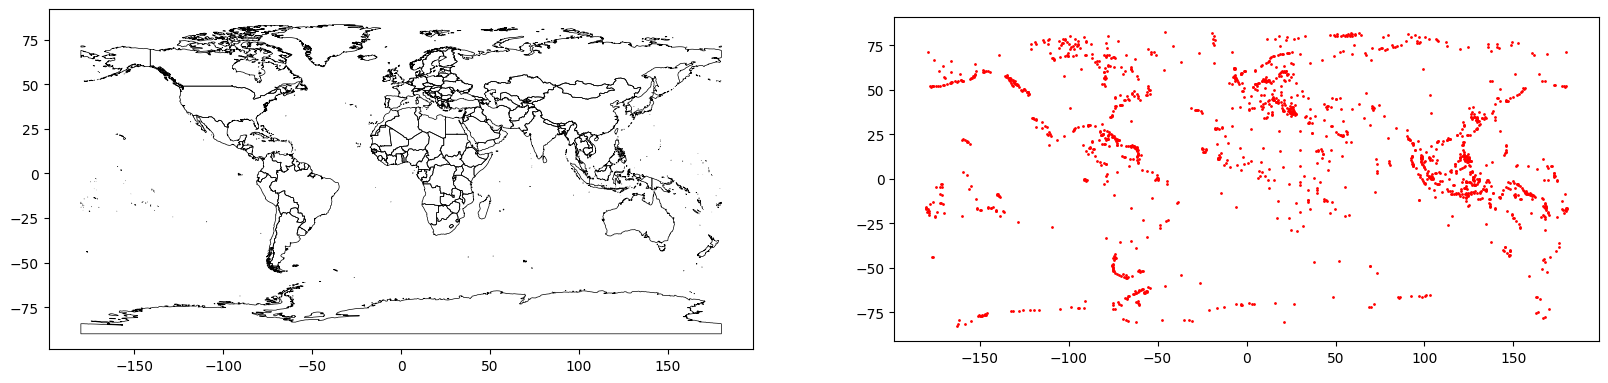

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

# Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax1, linewidth=0.5, color = "black")

# Plot the centroids
df_centroids['centroid'].plot(ax=ax2, color='red', markersize=1)

# Show the plot
plt.show()

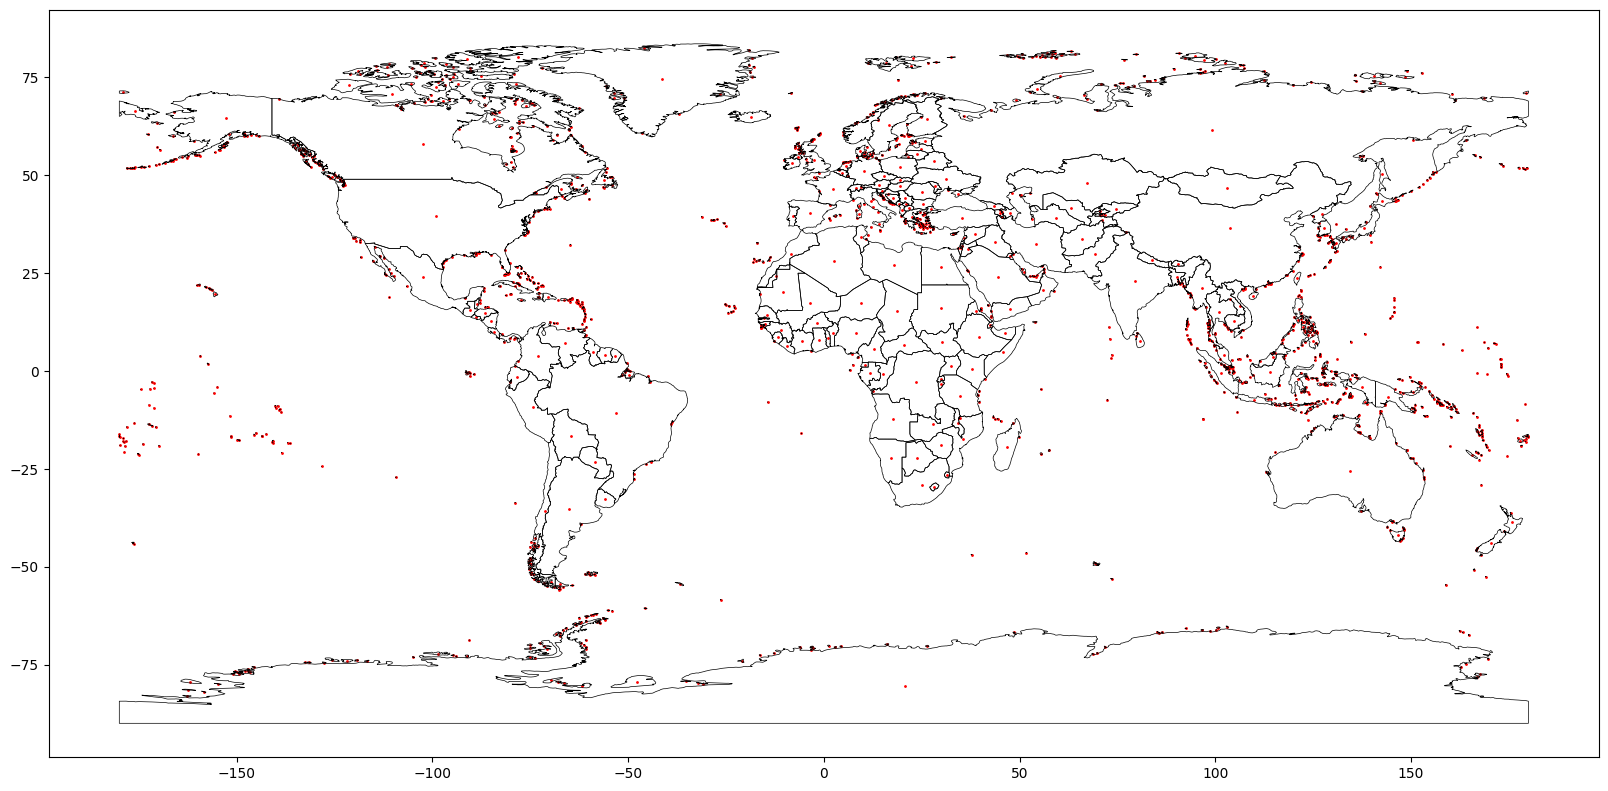

In [79]:
#overlay the centroids on the map, show the map, the centroids, and the overlay next to eachother
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax, linewidth=0.5, color = "black")

# Plot the centroids
df_centroids['centroid'].plot(ax=ax, color='red', markersize=1)

# Show the plot
plt.show()